In [29]:
#%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from sklearn import decomposition
from sklearn import datasets
from scipy.fftpack import fft, fftfreq
from scipy import signal
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

ImportError: No module named 'tqdm'

In [2]:
#load some EDF data
raw = mne.io.read_raw_edf('/data1/ecog_project/edf/aa9da7b2/aa9da7b2_5.edf')

Extracting edf Parameters from /data1/ecog_project/edf/aa9da7b2/aa9da7b2_5.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Ready.


In [3]:
##HYPERPARAMETER TODO? LOAD AFROM FILE?
#hyperpara in s for how large the time window should be on whihc we calculate our fourier trafo (and later Happy/Not Happy)
window_size=2
sfreq=raw.info['sfreq']
end_t=raw.time_as_index(len(raw))

In [5]:
start, stop = raw.time_as_index([10, 10+window_size])
print(stop-start)
channel=raw.get_data(picks=[4,5],start=start, stop=stop,reject_by_annotation=None, return_times=False)
#data=np.squeeze(channel[0])
data=channel
print(data)

1998
[[6.62205896e-03 6.62631237e-03 6.63535086e-03 ... 6.57846153e-03
  6.59069008e-03 6.58218326e-03]
 [8.45714761e-05 8.82932077e-05 9.68000229e-05 ... 3.67206406e-05
  4.31007520e-05 3.51256127e-05]]


In [6]:
# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))
# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(data[0,:]), 1.0/sfreq)
#welch method
fr,psd=signal.welch(data,sfreq)

#throw away everything above 100Hz for now (and 0)
freqs=fft_freq[fft_freq<101][1:]
vals=fft_vals[:,fft_freq<101][:,1:]


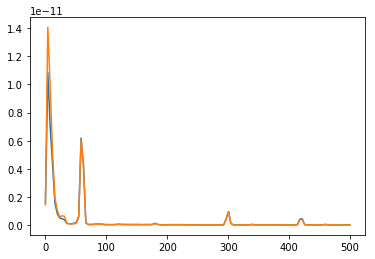

In [9]:
plt.plot(fr,psd[0])
plt.plot(fr,psd[1])

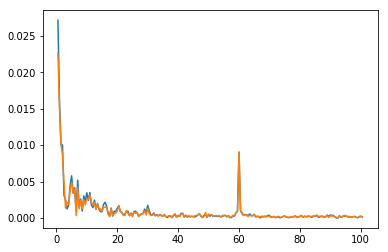

In [83]:
plt.plot(freqs,vals[1])
plt.plot(freqs,vals[0])

ValueError: x and y must have same first dimension, but have shapes (999,) and (1, 1000)

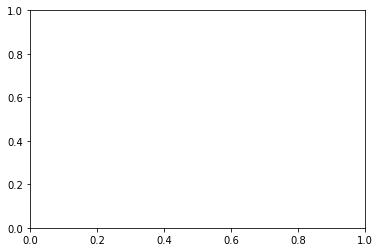

In [77]:
plt.plot(fft_freq[1:], fft_vals[1:])
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()
plt.plot(freqs,vals)
#plt.xlabel('Frequency')
#plt.ylabel('Intensity')

In [ ]:
#create matrix as follows:
#columns: channels, for each channel the 200 frequencies (0-200Hz) (hece freq*cha length)
#rows: Time steps
#resulting matrix is 2D, Time Stepsx(Freq*Channels)
def calc_data_mat(raw, w_size):
    time_it=0
    while True:
        #calculate times in sample points
        start, stop = raw.time_as_index([time_it,time_it+w_size])
        #get data of ALL channels
        data=raw.get_data(start=start,stop=stop,reject_by_annotation=None,return_times=False)
        #welch method
        fr,psd=signal.welch(data,sfreq)
        #truncate everythin above 200Hz
        psd=psd[fr<=200]
        if time_it==0:
            #first time. create first column, flatten w/o argument is row major 
            mat=psd.flatten()
        else:
            #after, add column for each time step
            mat=np.column_stack((mat,psd.flatten()))
        time_it+=w_size
        if time_it >= end_t+w_size:
            break
    return mat.T

#demean stuff
def demean(mat)
    mean=np.mean(mat,axis=0)
    mat_dem=mat-mean
    return mean, mat_dem

In [ ]:
#run actual PCA LOL YEAH FINALLY LOLOLOLOLOLOLOL

def elbow_curve(data):
    components = range(1, data.shape[1] + 1)
    explained_variance = []
    for component in tqdm(components[:50]):
        pca = PCA(n_components=component)
        pca.fit(data)
        explained_variance.append(sum(pca.explained_variance_ratio_))
    sns_plot = sns.regplot(
        x=np.array(components[:50]), y=explained_variance,
        fit_reg=False).get_figure()
    sns_plot.savefig("pca_elbow.png")